In [6]:
import os
import sys

if os.path.basename(os.getcwd()) == "testing":
    os.chdir(os.path.dirname(os.getcwd()))
    sys.path.append(os.getcwd())

# relative datasets path
DATASETS_PATH = "../datasets"
DATASET_NAMES = [name for name in os.listdir(DATASETS_PATH) if name != 'synthetic']  # exclude synthetic dataset
print("Datasets to be used:", DATASET_NAMES)
STORE_PATH = "testing/datasets_smol"


Datasets to be used: ['doc24', 'test', 'histo24', 'clic2024', 'div2k', 'kodak', 'datasets_smol', 'loveda24']



Processing dataset: doc24
Selected images: ['4.png', '8.png']
  Saved: testing/datasets_smol/doc24_4.png
  Saved: testing/datasets_smol/doc24_8.png



Processing dataset: test
Selected images: ['kodim02.png', 'kodim01.png']
  Saved: testing/datasets_smol/test_kodim02.png
  Saved: testing/datasets_smol/test_kodim01.png



Processing dataset: histo24
Selected images: ['7.png', '13.png']
  Saved: testing/datasets_smol/histo24_7.png
  Saved: testing/datasets_smol/histo24_13.png



Processing dataset: clic2024
Selected images: ['591e859bb57f4231382305e2a25b046ccbcc7db95f34facb89615135a3849028.png', '8019e85654193a14b938689e3cf06b790d39197eb5a57f9de83f7b58d2e3302c.png']
  Saved: testing/datasets_smol/clic2024_591e859bb57f4231382305e2a25b046ccbcc7db95f34facb89615135a3849028.png
  Saved: testing/datasets_smol/clic2024_8019e85654193a14b938689e3cf06b790d39197eb5a57f9de83f7b58d2e3302c.png


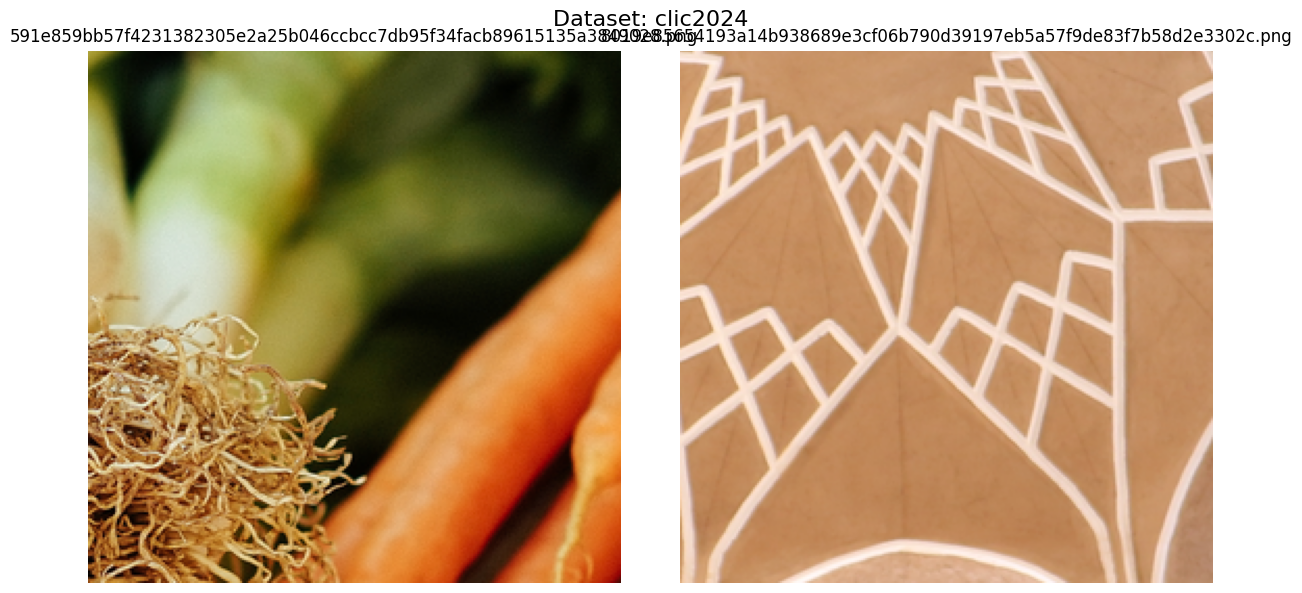


Processing dataset: div2k
Selected images: ['0808.png', '0879.png']
  Saved: testing/datasets_smol/div2k_0808.png
  Saved: testing/datasets_smol/div2k_0879.png


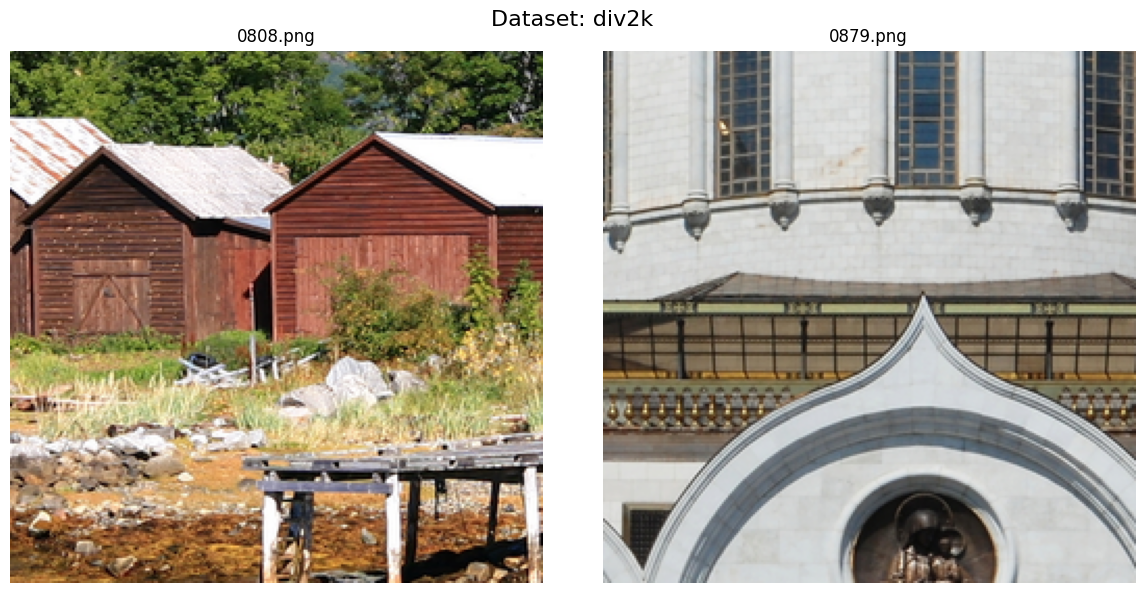


Processing dataset: kodak
Selected images: ['kodim04.png', 'kodim11.png']
  Saved: testing/datasets_smol/kodak_kodim04.png
  Saved: testing/datasets_smol/kodak_kodim11.png



Processing dataset: loveda24
Selected images: ['10.png', '21.png']
  Saved: testing/datasets_smol/loveda24_10.png
  Saved: testing/datasets_smol/loveda24_21.png



All datasets processed successfully!


In [7]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# Create store directory if it doesn't exist
os.makedirs(STORE_PATH, exist_ok=True)

# Process each dataset
for dataset_name in DATASET_NAMES:
    dataset_path = os.path.join(DATASETS_PATH, dataset_name)
    
    # Get all image files (common image extensions)
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.tif')
    all_images = [f for f in os.listdir(dataset_path) 
                  if f.lower().endswith(image_extensions) and os.path.isfile(os.path.join(dataset_path, f))]
    
    if len(all_images) < 2:
        print(f"Warning: Dataset {dataset_name} has less than 2 images. Skipping.")
        continue
    
    # Pick 2 random images
    selected_images = random.sample(all_images, 2)
    print(f"\nProcessing dataset: {dataset_name}")
    print(f"Selected images: {selected_images}")
    
    # Create a figure for plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f'Dataset: {dataset_name}', fontsize=16)
    
    for idx, img_name in enumerate(selected_images):
        # Load image
        img_path = os.path.join(dataset_path, img_name)
        img = Image.open(img_path).convert('RGB')
        
        # Get original dimensions
        width, height = img.size
        
        # Crop to 256x256 from center
        left = (width - 256) // 2
        top = (height - 256) // 2
        right = left + 256
        bottom = top + 256
        
        # If image is smaller than 256x256, resize first
        if width < 256 or height < 256:
            # Resize maintaining aspect ratio with minimum dimension of 256
            scale = max(256 / width, 256 / height)
            new_width = int(width * scale)
            new_height = int(height * scale)
            img = img.resize((new_width, new_height), Image.LANCZOS)
            width, height = img.size
            left = (width - 256) // 2
            top = (height - 256) // 2
            right = left + 256
            bottom = top + 256
        
        img_cropped = img.crop((left, top, right, bottom))
        
        # Convert to numpy array
        img_array = np.array(img_cropped)
        
        # Plot
        axes[idx].imshow(img_array)
        axes[idx].set_title(img_name)
        axes[idx].axis('off')
        
        # # Save as numpy array with original filename (changing extension to .npy)
        # original_name = Path(img_name).stem
        # save_name = f"{original_name}.npy"
        # save_path = os.path.join(STORE_PATH, f"{dataset_name}_{save_name}")
        # np.save(save_path, img_array)
        # print(f"  Saved: {save_path}")

        # Save the image as PNG
        original_name = Path(img_name).stem
        save_name = f"{original_name}.png"
        save_path = os.path.join(STORE_PATH, f"{dataset_name}_{save_name}")
        img_cropped.save(save_path)
        print(f"  Saved: {save_path}")
    plt.tight_layout()
    plt.show()

print("\nAll datasets processed successfully!")